Importamos librerias necesarias 

In [7]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport as pr
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re



leemos los archivos

In [8]:
hechos_homicidios = pd.read_excel('datasets\\hechos_homicidios.xlsx')
victimas_homicidios = pd.read_excel('datasets\\victimas_homicidios.xlsx')


In [9]:
hechos_homicidios.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


verificamos tipo de datos por cada tabla

In [10]:
hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [11]:
victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


cambiamos el nombre de la columna id_hecho para hacer un inner y trabajar de manera mas optima en una sola tabla 

In [12]:
victimas_homicidios=victimas_homicidios.rename(columns={'ID_hecho':'ID'})

In [13]:
victimas_homicidios

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [14]:
df_combinado = hechos_homicidios.merge(victimas_homicidios, on='ID', how='inner')

para tener mayor rendimiento en el proceso se realiza un inner

In [15]:
df_combinado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,AUTO,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,AUTO,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,CARGAS,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,CARGAS,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


verificamos que columnas son iguales y se elimminan

In [16]:
import pandas as pd

def encontrar_columnas_diferentes(df):
    columnas_diferentes = []
    columnas_iguales = []

    for columna1 in df.columns:
        for columna2 in df.columns:
            if columna1 != columna2:
                if (df[columna1] == df[columna2]).all():
                    columnas_iguales.append((columna1, columna2))
                elif not (df[columna1] == df[columna2]).all():
                    columnas_diferentes.append((columna1, columna2))

    return columnas_iguales, columnas_diferentes


columnas_iguales, columnas_diferentes = encontrar_columnas_diferentes(df_combinado[df_combinado.columns])

print("Pares de columnas iguales:")
for columna1, columna2 in columnas_iguales:
    print(f"{columna1} y {columna2} son iguales")



Pares de columnas iguales:
AAAA_x y AAAA_y son iguales
MM_x y MM_y son iguales
AAAA_y y AAAA_x son iguales
MM_y y MM_x son iguales


In [17]:

# Eliminar la columna 'AAAA_y','MM_y'
combinado = df_combinado.drop(['AAAA_y','MM_y'],axis=1)


verificamos por que las columnas FECHA , DIA y VICTIMAS no son iguales 

In [18]:
indices=[]
for index, row  in combinado[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['FECHA_x'] !=row['FECHA_y']:
        indices.append(index)


    if row['DD_x'] !=row['DD_y']:
        indices.append(index)
    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)


In [19]:
indices

[65, 204, 204, 237, 238, 602, 603]

se puede concluir que la columna de fecha_Y, victima_y de victima_y tiene la misma fecha de fallecimiento por lo tanto se eliminara

In [20]:
combinado[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,FECHA_y,DD_x,DD_y,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,2016-07-03,3,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,2017-05-29,24,29,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,2017-05-29,24,29,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
238,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
602,2020-12-05,2020-12-05,5,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,2020-12-05,5,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [21]:
combinado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,PARTICIPANTES,VICTIMA_x,ACUSADO,FECHA_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2016-01-01,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2016-01-03,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,MOTO-SD,MOTO,SD,2016-01-10,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-01-21,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2021-12-13,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,MOTO-AUTO,MOTO,AUTO,2021-12-20,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,MOTO-CARGAS,MOTO,CARGAS,2021-12-30,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,AUTO-CARGAS,AUTO,CARGAS,2021-12-15,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [22]:
# Eliminar la columna 'AAAA_y','MM_y'
combinado = combinado.drop(['DD_y','FECHA_y' ],axis=1)


verificamos que hay un valor atipico en la columna victima_x donde dice que es objeto fijo lo cual no es congruente, con esto podemos deducir que pertenece ese valor a la columna acusado y se hara el cambio

In [23]:
combinado[['FECHA_x', 'DD_x', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
238,2017-09-02,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
602,2020-12-05,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [24]:

# Encuentra las filas donde 'VICTIMA_x' es igual a 'OBJETO FIJO'
filas_objeto_fijo = combinado['VICTIMA_x'] == 'OBJETO FIJO'

# Almacena temporalmente los valores de 'VICTIMA_x' en una columna temporal
combinado.loc[filas_objeto_fijo, 'TEMP'] = combinado.loc[filas_objeto_fijo, 'VICTIMA_x']

# Intercambia los valores entre 'VICTIMA_x' y 'ACUSADO'
combinado.loc[filas_objeto_fijo, 'VICTIMA_x'] = combinado.loc[filas_objeto_fijo, 'ACUSADO']
combinado.loc[filas_objeto_fijo, 'ACUSADO'] = combinado.loc[filas_objeto_fijo, 'TEMP']

# Elimina la columna temporal 'TEMP'
combinado.drop(columns=['TEMP'], inplace=True)


In [25]:
combinado[['FECHA_x', 'DD_x', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2,AUTO,AUTO,2017-09-02 00:00:00,OBJETO FIJO
238,2017-09-02,2,AUTO,AUTO,2017-09-02 00:00:00,OBJETO FIJO
602,2020-12-05,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


verificamos valores de la columna victima_x y victima_y

In [26]:
indices=[]
for index, row  in combinado[['FECHA_x', 'DD_x','VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)

podemos verificar que los unicos valores diferentes en estas columnas son los que se encuentran en el indice 602 y 603 de lo que podemos deducir que su diferencia es por que son 2 victimas en la cual se informa en la columna victima_y peaton y moto por lo tanto se eliminara la columna victima_x que viene de la tabla hechos 

In [27]:
combinado[['VICTIMA_x',  'VICTIMA_y']].iloc[indices]

,VICTIMA_x,VICTIMA_y
602,PEATON_MOTO,PEATON
603,PEATON_MOTO,MOTO


In [28]:
combinado = combinado.drop(['VICTIMA_y'],axis=1)

In [29]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA_x                717 non-null    datetime64[ns]
 3   AAAA_x                 717 non-null    int64         
 4   MM_x                   717 non-null    int64         
 5   DD_x                   717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [30]:

combinado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


renombramos columnas

In [31]:
combinado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [32]:
#codigo para renombrar columnas
combinado = combinado.rename(columns ={'FECHA_x':'FECHA', 'AAAA_x': 'AAAA','MM_x': 'MM','DD_x': 'DD','pos x': 'Longitud','pos y':'Latitud','VICTIMA_x':'VICTIMA'  })

In [33]:
#verificamos 
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


verificando la columna n_victimas hay una incongruencia por que la fila esta repetida la cantidad de veces que dice el valor en esa columna por lo tanto se cambia el valor a 1 que seria el adecuado

In [34]:
combinado['N_VICTIMAS']=1

In [35]:
#verificamos
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


In [36]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

se corrige formato de longitud y latitud 

In [37]:
import pandas as pd

# Intenta convertir las columnas 'Latitud' y 'Longitud' en números flotantes con 'errors='coerce''
combinado['Latitud'] = pd.to_numeric(combinado['Latitud'], errors='coerce')
combinado['Longitud'] = pd.to_numeric(combinado['Longitud'], errors='coerce')

# Encuentra las filas con valores problemáticos (NaN) en las columnas 'Latitud' o 'Longitud'
filas_con_nan = combinado[(combinado['Latitud'].isna()) | (combinado['Longitud'].isna())]

# Imprime las filas con valores problemáticos para identificar y corregir los datos
print(filas_con_nan)


            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
39   2016-0052           1 2016-04-20  2016   4  20  20:00:00  20   
108  2016-0136           1 2016-10-25  2016  10  25  00:00:00   0   
121  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
141  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   
182  2017-0042           1 2017-04-10  2017   4  10  09:00:00   9   
186  2017-0050           1 2017-04-28  2017   4  28  11:08:08  11   
187  2017-0050           1 2017-04-28  2017   4  28  11:08:08  11   
188  2017-0051           1 2017-05-01  2017   5   1  03:47:47   3   
266  2017-0140           1 2017-11-19  2017  11  19  23:22:17  23   
327  2018-0039           1 2018-04-21  2018   4  21  22:15:00  22   
564  2020-0026           1 2020-05-17  2020   5  17  06:40:00   6   
578  2020-0039           1 2020-09-01  2020   9   1  19:17:42  19   
642  2021-0023           1 2021-03-01  2021   3   1  09:20:00   9   

                             LUGA

In [38]:
combinado.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


verificamos las celdas de cada columna donde esten sin dato

In [39]:
import pandas as pd

# Valor 'SD' a buscar
valor_a_buscar = 'SD'

# Iterar a través de cada columna y encontrar las celdas que contienen el valor 'SD'
for columna in combinado.columns:
    celdas_con_valor_sd = combinado[combinado[columna] == valor_a_buscar]
    
    # Imprimir las celdas con el valor 'SD' en la columna actual
    if not celdas_con_valor_sd.empty:
        print({columna})
       

{'HORA'}
{'HH'}
{'LUGAR_DEL_HECHO'}
{'VICTIMA'}
{'ACUSADO'}
{'ROL'}
{'SEXO'}
{'EDAD'}
{'FECHA_FALLECIMIENTO'}


verificando que solo tenemos un valor sin dato en la columna hora se toma la desicion de reemplazarla por la media de la columna hora 

In [40]:
valores_igual_0 = combinado.loc[combinado['HORA'] == 'SD']
valores_igual_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
536,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,Point (94643.11254058 103831.57115061),-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO,CONDUCTOR,MASCULINO,24,2019-12-18 00:00:00


Reemplazamos valor SD por nan

In [70]:
# se realiza la funcion para intercambiar valores
def columns_modifier(mode,DF,columns, value, replace=None):
    df=DF.copy()
    if mode == 'swap':
        for index, row in df.iterrows():

            value_1=row[columns[0]]
            value_2=row[columns[1]]

            if value_1== value:
                temp=value_1
                df.at[index, columns[0]] = value_2
                df.at[index, columns[1]] = temp
    if mode == 'replace':
        for index, row in df.iterrows():
            to_replace=row[columns[0]]

            if to_replace == value:
                df.at[index, columns[0]] = replace
    return df

llamo la funcion 

In [42]:
columna=['HH']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

In [43]:
columna=['HORA']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

In [44]:
columna=['EDAD']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

 creamos una funcion que toma un número decimal que representa una hora y lo convierte en una cadena de texto con formato de hora en el formato "HH:MM" (horas:minutos).

In [45]:
def convertir_hora(decimal_hora):
    # Extraer la parte entera y decimal de la hora
    horas_enteras = int(decimal_hora)
    minutos_decimales = (decimal_hora - horas_enteras) * 60

    # Formatear como cadena de tiempo (HH:MM)
    hora_formateada = f"{horas_enteras:02d}:{int(minutos_decimales):02d}"

    return hora_formateada

In [46]:
combinado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'Longitud', 'Latitud',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

se realiza el cambio de SD en la columna FECHA_FALLECIMIENTO por nan

In [47]:
columna=['FECHA_FALLECIMIENTO']

combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

Se verifica

In [48]:
combinado.iloc[121]

ID                                 2016-0151
N_VICTIMAS                                 1
FECHA                    2016-11-18 00:00:00
AAAA                                    2016
MM                                        11
DD                                        18
HORA                                20:35:00
HH                                        20
LUGAR_DEL_HECHO                           SD
TIPO_DE_CALLE                          CALLE
Calle                                    NaN
Altura                                   NaN
Cruce                                    NaN
Dirección Normalizada                    NaN
COMUNA                                     0
XY (CABA)                        Point (. .)
Longitud                                 NaN
Latitud                                  NaN
PARTICIPANTES                      PEATON-SD
VICTIMA                               PEATON
ACUSADO                                   SD
ROL                                   PEATON
SEXO      

estas líneas de código están tratando de manejar valores faltantes en las columnas 'HORA' y 'HH' del DataFrame 'combinado' al calcular la hora promedio a partir de 'HH', llenar los valores faltantes en 'HORA' con la hora promedio en un formato legible de "HH:MM", y asegurarse de que todos los valores en 'HH' sean enteros.

In [71]:
# Esta línea de código está llenando los valores faltantes en la columna 'HORA' del DataFrame 'combinado
combinado['HORA']=combinado['HORA'].fillna(convertir_hora(combinado['HH'].mean()))
#  Esta línea de código se ocupa de la columna 'HH' en el DataFrame 'combinado'
combinado['HH']=combinado['HH'].fillna(combinado['HH'].mean()).apply(int)

In [50]:
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,NaN
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


este código se utiliza para identificar y mostrar las filas en el DataFrame 'combinado' que contienen valores en la columna 'HORA' que no cumplen con el formato de hora "HH:MM:SS".

In [51]:

# Convertir los valores de la columna "hora" a cadenas de texto
combinado['HORA'] = combinado['HORA'].astype(str)

# Verificar si el valor en cada fila tiene un formato de hora válido
formato_correcto = combinado['HORA'].str.match(r'^\d{2}:\d{2}:\d{2}$')

# Filtrar las filas con formato diferente
filas_con_formato_diferente = combinado[~formato_correcto]

# Mostrar las filas con formato diferente
print("Filas con formato diferente:")
print(filas_con_formato_diferente)




Filas con formato diferente:
            ID  N_VICTIMAS      FECHA  AAAA  MM  DD                 HORA  HH  \
457  2019-0022           1 2019-03-15  2019   3  15  1900-01-02 00:00:00   0   
459  2019-0024           1 2019-03-19  2019   3  19  1900-01-14 07:12:00   7   
514  2019-0080           1 2019-09-17  2019   9  17  1900-01-04 18:40:00  18   
536  2019-0103           1 2019-12-18  2019  12  18                11:33  11   

                                       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
457  ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX)       AVENIDA  ...   
459                       ANTARTIDA ARGENTINA AV. 1325       AVENIDA  ...   
514                       CABILDO AV. y PAZ, GRAL. AV.      GRAL PAZ  ...   
536                            PAZ, GRAL. AV. Y GRIVEO      GRAL PAZ  ...   

                                   XY (CABA)   Longitud    Latitud  \
457  Point (106608.39392805 100635.27735528) -58.391238 -34.623522   
459  Point (108368.93688513 104860.74716674)

 este código se utiliza para intentar convertir los valores en la columna 'HORA' en objetos de tiempo y luego identificar y mostrar las filas que contienen errores de conversión, es decir, aquellas en las que el formato de la hora no es válido y no se puede convertir correctamente en un objeto de tiempo.

In [52]:

# Convertir los valores de la columna "hora" a objetos de tiempo (datetime)
combinado['HORA'] = pd.to_datetime(combinado['HORA'], errors='coerce')

# Identificar filas con errores de conversión (formato incorrecto)
filas_con_errores = combinado[combinado['HORA'].isna()]

# Mostrar las filas con formato diferente
print("Filas con formato diferente:")
print(filas_con_errores)

C:\Users\TOCALACTEOS\AppData\Local\Temp\ipykernel_7968\336251427.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combinado['HORA'] = pd.to_datetime(combinado['HORA'], errors='coerce')


Filas con formato diferente:
Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), Longitud, Latitud, PARTICIPANTES, VICTIMA, ACUSADO, ROL, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []

[0 rows x 25 columns]


verificamos si hay valores SD en la columna HORA

In [53]:
valores_igual_0 = combinado.loc[combinado['HORA'] == 'SD']
valores_igual_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO


In [55]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    datetime64[ns]
 7   HH                     717 non-null    int64         
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

se crea la columna semestre para el calculo del kpi

In [56]:
# Extraer el mes de la fecha y calcular el semestre
combinado['SEMESTRE'] = (combinado['FECHA'].dt.month - 1) // 6 + 1


finalmente se confirma nuevamente todos los cambios y se guarda

In [58]:
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,2016,1,1,2023-09-12 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1
1,2016-0002,1,2016-01-02,2016,1,2,2023-09-12 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,1
2,2016-0003,1,2016-01-03,2016,1,3,2023-09-12 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,1
3,2016-0004,1,2016-01-10,2016,1,10,2023-09-12 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,NaN,1
4,2016-0005,1,2016-01-21,2016,1,21,2023-09-12 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,2023-09-12 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00,2
713,2021-0094,1,2021-12-20,2021,12,20,2023-09-12 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00,2
714,2021-0095,1,2021-12-30,2021,12,30,2023-09-12 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00,2
715,2021-0096,1,2021-12-15,2021,12,15,2023-09-12 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00,2


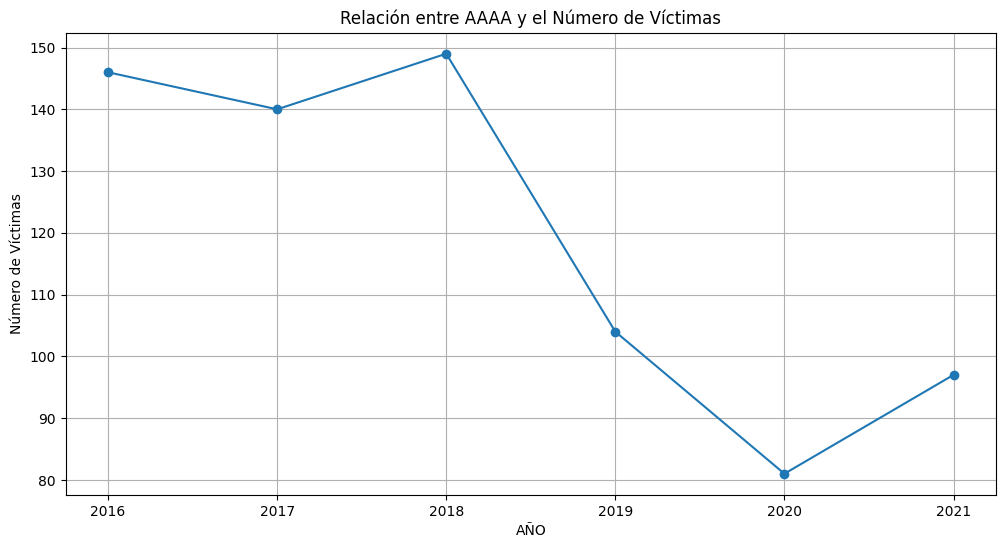

In [59]:
%matplotlib inline 

# Resto de tu código aquí

# Agrupa los datos por fecha y suma el número de víctimas en cada fecha
victimas_por_fecha = combinado.groupby('AAAA')['N_VICTIMAS'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.plot(victimas_por_fecha['AAAA'], victimas_por_fecha['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('Relación entre AAAA y el Número de Víctimas')
plt.xlabel('AÑO')
plt.ylabel('Número de Víctimas')
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [72]:
victimas_por_fecha

,AAAA,N_VICTIMAS
0,2016,146
1,2017,140
2,2018,149
3,2019,104
4,2020,81
5,2021,97


Analisis grafica 1 : 

1. Tendencia temporal:
   Observamos que el cuadro presenta datos desde 2016 hasta 2021. Esto nos permite analizar la tendencia temporal en el número de víctimas. Podemos notar una disminución en el número de víctimas desde 2018 hasta 2021 después de un pico en 2018.

2. Pico en 2018:
   El año 2018 destaca como el año con el mayor número de víctimas, con 149. Sería interesante investigar por qué hubo un aumento significativo en ese año en comparación con años anteriores y posteriores.

3. Disminución en 2019 y 2020:
   En 2019, el número de víctimas disminuyó a 104, y en 2020 disminuyó aún más a 81. Esto podría indicar una tendencia a la baja en la cantidad de víctimas durante estos dos años.

4. Aumento en 2021:
   Sin embargo, en 2021, el número de víctimas aumentó nuevamente a 97. Sería interesante investigar las razones detrás de esta reversión en la tendencia a la baja después de dos años de disminución.

5. Posibles factores influyentes:
   Para un análisis más completo, sería útil considerar posibles factores que podrían haber contribuido a las variaciones en el número de víctimas a lo largo de estos años. Algunos factores que podrían influir incluyen políticas gubernamentales, cambios en la economía, medidas de seguridad, entre otros.

6. Estadísticas descriptivas:
   Sería útil calcular estadísticas descriptivas como la media, la mediana y la desviación estándar para tener una idea más precisa de la distribución de los datos y la variabilidad en el número de víctimas a lo largo de estos años.


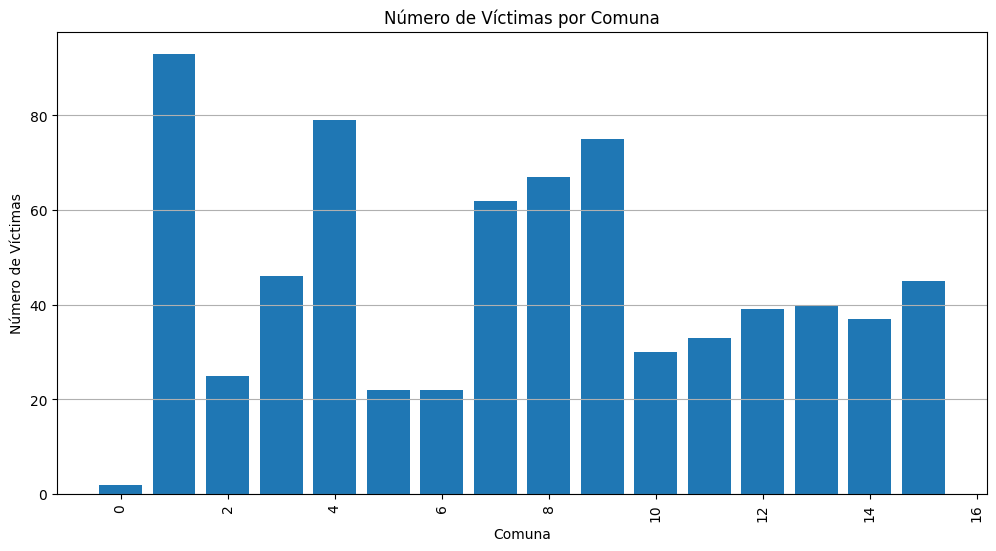

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'combinado' con las columnas necesarias

# Cuenta el número de víctimas en cada comuna
victimas_por_comuna = combinado.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Crea la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_comuna['COMUNA'], victimas_por_comuna['N_VICTIMAS'])
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


In [73]:
victimas_por_comuna

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75



1. Distribución de víctimas por comuna:
   - La tabla muestra 16 comunas diferentes (números del 0 al 15) y el número de víctimas en cada una de ellas.
   - La cantidad de víctimas varía significativamente entre las comunas, oscilando entre 2 y 93 víctimas.

2. Comuna con el mayor número de víctimas:
   - La comuna con el mayor número de víctimas es la Comuna 1, con 93 víctimas. Esto podría indicar un área de interés para investigar más a fondo las razones detrás de esta cifra alta.

3. Comuna con el menor número de víctimas:
   - La Comuna 0 tiene el menor número de víctimas, con solo 2. Esto también puede ser un punto de interés para investigar las condiciones que llevan a esta cifra baja.

4. Distribución general:
   - La distribución de víctimas en estas comunas parece ser bastante heterogénea, ya que algunas comunas tienen un número significativamente mayor de víctimas que otras.

5. Análisis estadístico:
   - Sería útil realizar un análisis estadístico más detallado para comprender mejor la variabilidad en el número de víctimas entre las comunas. Esto podría incluir cálculos como la media, mediana, desviación estándar y otros estadísticos descriptivos.

6. Factores influyentes:
   - Para un análisis más completo, sería importante considerar factores que podrían influir en el número de víctimas en cada comuna. Estos factores podrían incluir la densidad de población, la presencia de servicios de seguridad, medidas de prevención del delito, entre otros.


In [61]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Crea un mapa de calor utilizando las coordenadas de longitud y latitud
m = folium.Map(location=[combinado['Latitud'].mean(), combinado['Longitud'].mean()], zoom_start=12)

# Convierte los datos de longitud y latitud en una lista de listas, excluyendo valores NaN
heat_data = [[row['Latitud'], row['Longitud']] for index, row in combinado.dropna(subset=['Latitud', 'Longitud']).iterrows()]

# Agrega el mapa de calor al mapa folium
HeatMap(heat_data).add_to(m)

# Muestra el mapa en el entorno interactivo
display(m)



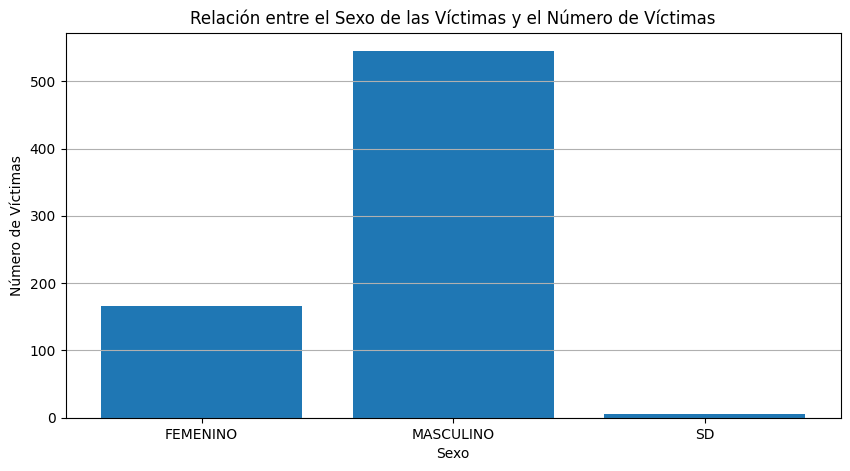

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'combinado' con las columnas 'VICTIMA' y 'SEXO'

# Agrupa los datos por sexo y suma el número de víctimas en cada categoría
victimas_por_sexo = combinado.groupby('SEXO')['VICTIMA'].count().reset_index()

# Crea la gráfica de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.bar(victimas_por_sexo['SEXO'], victimas_por_sexo['VICTIMA'])
plt.title('Relación entre el Sexo de las Víctimas y el Número de Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


In [74]:
victimas_por_sexo

,SEXO,VICTIMA
0,FEMENINO,166
1,MASCULINO,545
2,SD,6



1. Distribución por género:
   - El DataFrame presenta dos categorías principales de género: "FEMENINO" y "MASCULINO".
   - La categoría "FEMENINO" tiene 166 víctimas, mientras que "MASCULINO" tiene 545 víctimas.

2. Diferencia significativa en el número de víctimas:
   - Es evidente que hay una diferencia significativa en el número de víctimas entre los géneros. El género masculino tiene un número mucho mayor de víctimas que el género femenino.

3. Proporción de género:
   - Sería útil calcular la proporción de género para tener una comprensión más precisa de la relación entre las dos categorías. En este caso, la proporción de género masculino a femenino es aproximadamente 3.29:1.

4. Implicaciones y análisis adicional:
   - Esta diferencia en el número de víctimas entre géneros podría ser el resultado de múltiples factores, como la distribución de roles de género en la sociedad, la exposición a diferentes riesgos o la subnotificación de casos en función del género.


Histograma de Edades

In [103]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'combinado' con una columna 'EDAD'
# Creamos tres categorías de edad
categorias_edad = pd.cut(combinado['EDAD'], bins=[0, 18, 55, 95], labels=['Niños', 'Adultos Jóvenes', 'Adultos Mayores'])

# Agregamos la nueva columna 'CATEGORIA_EDAD' al DataFrame original
combinado['CATEGORIA_EDAD'] = categorias_edad


In [105]:
combinado.to_csv('datasets\combinado_homicidios.csv')

In [104]:
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE,CATEGORIA_EDAD
0,2016-0001,1,2016-01-01,2016,1,1,2023-09-12 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1,Adultos Jóvenes
1,2016-0002,1,2016-01-02,2016,1,2,2023-09-12 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,1,Adultos Mayores
2,2016-0003,1,2016-01-03,2016,1,3,2023-09-12 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,1,Adultos Jóvenes
3,2016-0004,1,2016-01-10,2016,1,10,2023-09-12 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,NaN,1,Niños
4,2016-0005,1,2016-01-21,2016,1,21,2023-09-12 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,1,Adultos Jóvenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,2023-09-12 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00,2,Niños
713,2021-0094,1,2021-12-20,2021,12,20,2023-09-12 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00,2,Adultos Jóvenes
714,2021-0095,1,2021-12-30,2021,12,30,2023-09-12 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00,2,Adultos Jóvenes
715,2021-0096,1,2021-12-15,2021,12,15,2023-09-12 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00,2,Adultos Mayores


In [79]:
victimas_categoria_edad = combinado.groupby('CATEGORIA_EDAD')['VICTIMA'].count().reset_index()

In [80]:
victimas_categoria_edad

,CATEGORIA_EDAD,VICTIMA
0,Niños,80
1,Adultos Jóvenes,262
2,Adultos Mayores,322


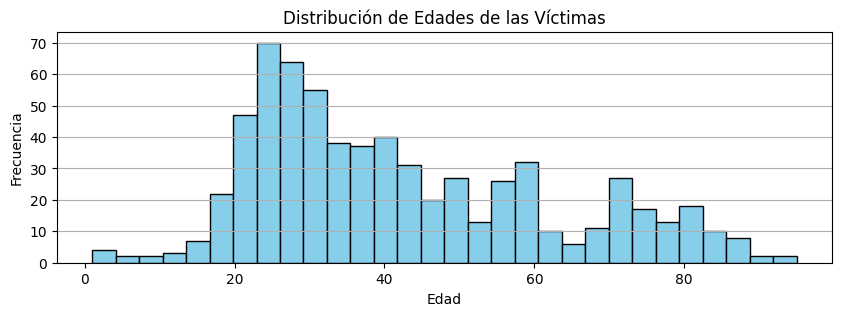

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(10, 3))
plt.hist(combinado['EDAD'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()
plt.savefig('distribucion_edades.png') 




1. Distribución por categoría de edad:
   - El DataFrame presenta tres categorías principales de edad: "Niños", "Adultos Jóvenes" y "Adultos Mayores".
   - La categoría "Niños" tiene 80 muertes por siniestros viales, la categoría "Adultos Jóvenes" tiene 262, y la categoría "Adultos Mayores" tiene 322.

2. Diferencias en el número de muertes por categoría de edad:
   - Existen diferencias significativas en el número de muertes por siniestros viales entre las categorías de edad. La categoría "Adultos Mayores" tiene el mayor número de muertes, seguida por "Adultos Jóvenes", mientras que "Niños" tiene el menor número de muertes.

3. Interpretación de los resultados:
   - Estas diferencias en el número de muertes por categoría de edad podrían estar relacionadas con la vulnerabilidad de cada grupo de edad en siniestros viales, así como con la exposición a diferentes riesgos en la carretera.

5. Análisis demográfico:
   - Sería útil considerar las características demográficas de cada grupo de edad, como la población total en cada categoría, para comprender mejor si estas diferencias son proporcionales a la población en riesgo.

6. Prevención y seguridad vial:
   - Estos datos pueden ser útiles para evaluar políticas y programas de seguridad vial dirigidos a grupos específicos de edad. Por ejemplo, si los "Adultos Mayores" tienen un alto número de muertes en siniestros viales, podría ser importante implementar medidas adicionales de seguridad para este grupo en particular, como campañas de concienciación y mejoras en las infraestructuras viales.

Diagrama de Barras por Tipo de Calle

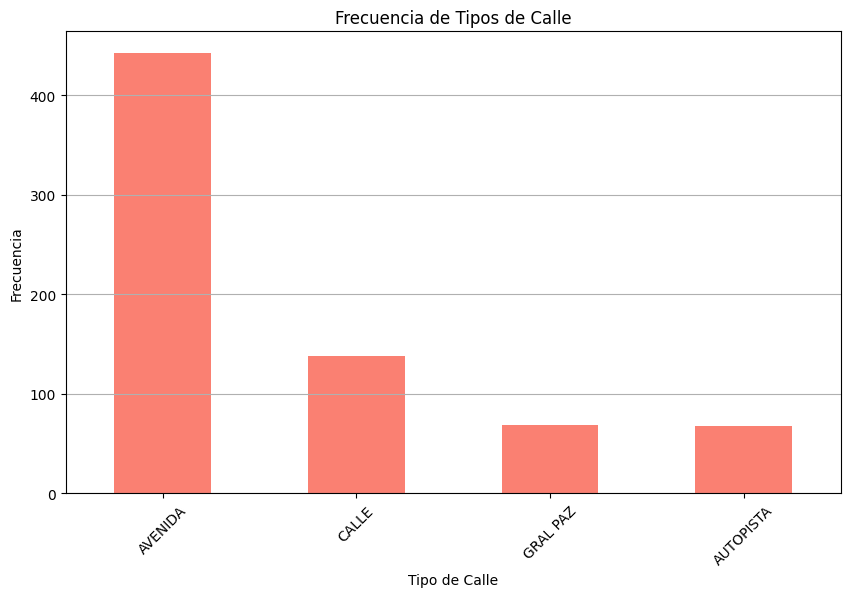

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(10, 6))
combinado['TIPO_DE_CALLE'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frecuencia de Tipos de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
plt.savefig('distribucion_tipo_calle.jpg') 

In [81]:
victimas_tipo_calle = combinado.groupby('TIPO_DE_CALLE')['VICTIMA'].count().reset_index()

In [82]:
victimas_tipo_calle

,TIPO_DE_CALLE,VICTIMA
0,AUTOPISTA,68
1,AVENIDA,442
2,CALLE,138
3,GRAL PAZ,69



1. Distribución por tipo de calle:
   - El DataFrame presenta cuatro categorías principales de tipo de calle: "AUTOPISTA", "AVENIDA", "CALLE" y "GRAL PAZ".
   - La categoría "AVENIDA" tiene la mayor cantidad de víctimas por siniestros viales, con 442. Le sigue "CALLE" con 138, "GRAL PAZ" con 69 y "AUTOPISTA" con 68.

2. Diferencias en el número de víctimas por tipo de calle:
   - Existen diferencias significativas en el número de víctimas por siniestros viales entre los tipos de calle. "AVENIDA" tiene el mayor número de víctimas, mientras que "AUTOPISTA" tiene un número ligeramente menor.

3. Proporciones de víctimas por tipo de calle:
   - Calcular la proporción de víctimas en cada tipo de calle puede ayudar a comprender mejor la relación entre ellos. Por ejemplo, se podría calcular la proporción de víctimas en "AVENIDA" en relación con "AUTOPISTA" o la proporción de víctimas en "CALLE" en relación con "AVENIDA".

4. Interpretación de los resultados:
   - Estas diferencias en el número de víctimas por tipo de calle podrían estar relacionadas con la velocidad máxima permitida en cada tipo de carretera, el volumen de tráfico, la presencia de semáforos y señalización, y otros factores de seguridad vial.

5. Medidas de seguridad vial:
   - Los datos pueden ser útiles para evaluar la efectividad de las medidas de seguridad vial en diferentes tipos de carreteras. Por ejemplo, si "AVENIDA" tiene una alta cantidad de víctimas, podría ser necesario revisar las medidas de seguridad y la infraestructura en ese tipo de carretera.


Diagrama de Barras Apiladas por Rol y victima:

In [93]:
victimas_rol1 = combinado.groupby(['ROL', 'VICTIMA']).size().reset_index(name='COUNT')

In [94]:
victimas_rol1

,ROL,VICTIMA,COUNT
0,CICLISTA,BICICLETA,29
1,CONDUCTOR,AUTO,65
2,CONDUCTOR,CARGAS,3
3,CONDUCTOR,MOTO,261
4,CONDUCTOR,MOVIL,1
5,PASAJERO_ACOMPAÑANTE,AUTO,29
6,PASAJERO_ACOMPAÑANTE,CARGAS,4
7,PASAJERO_ACOMPAÑANTE,MOTO,38
8,PASAJERO_ACOMPAÑANTE,MOVIL,2
9,PASAJERO_ACOMPAÑANTE,PASAJEROS,5


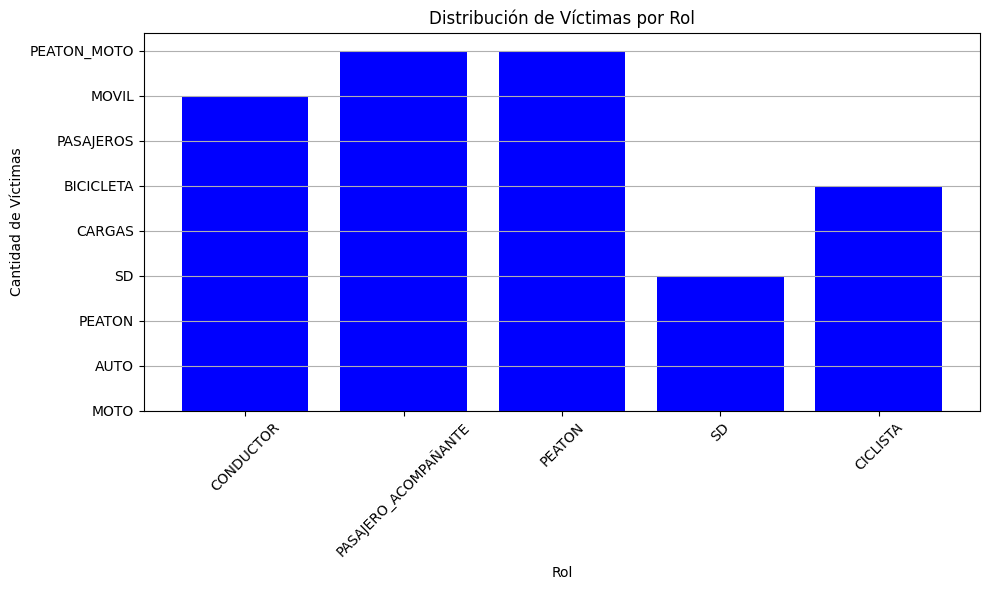

In [89]:

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(combinado['ROL'], combinado['VICTIMA'], color='blue')

# Personalizar el gráfico
plt.title('Distribución de Víctimas por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()


El DataFrame proporciona datos sobre el rol de las víctimas en siniestros viales, el tipo de vehículo involucrado y la cantidad de casos para cada combinación. 

1. Distribución de roles y tipos de vehículos:
   - El DataFrame muestra varias combinaciones de roles de víctimas y tipos de vehículos involucrados en siniestros viales.
   - Por ejemplo, hay conductores de autos, conductores de motos, ciclistas, pasajeros de autos, pasajeros de motos, peatones, y otros.

2. Número de casos:
   - El DataFrame también presenta el número de casos para cada combinación. Por ejemplo:

"CICLISTA" - "BICICLETA" - 29 casos:

Estos casos representan situaciones en las que la víctima era un ciclista que sufrió un siniestro vial mientras conducía una bicicleta.

"CONDUCTOR" - "AUTO" - 65 casos:

En estos casos, la víctima era el conductor de un automóvil. Las personas heridas estaban al mando de un vehículo destinado al transporte de personas.

"PEATON" - "PEATON" - 266 casos:

En estos casos, las víctimas eran peatones, es decir, personas que no se encontraban en ningún vehículo motorizado en el momento del siniestro. Estas personas sufrieron lesiones mientras caminaban.

"PASAJERO_ACOMPAÑANTE" - "AUTO" - 29 casos:


En estos casos, no se tiene información sobre el tipo de víctima, pero se sabe que estaban involucrados en siniestros viales con motocicletas.

"CONDUCTOR" - "MOTO" - 261 casos:

Estos casos representan situaciones en las que la víctima era el conductor de una motocicleta, ya sea una motocicleta estándar, un ciclomotor o un cuatriciclo.


En resumen, este DataFrame proporciona información detallada sobre la relación entre el rol de las víctimas y el tipo de vehículo involucrado en siniestros viales, junto con la cantidad de casos para cada combinación. Este análisis puede ser un punto de partida para abordar problemas de seguridad vial específicos y tomar medidas adecuadas para reducir los riesgos en las carreteras.

Gráfico de Barras por Mes de Siniestros:

In [95]:
victimas_por_mes = combinado.groupby('MM')['VICTIMA'].count().reset_index()

In [96]:
victimas_por_mes

,MM,VICTIMA
0,1,62
1,2,59
2,3,56
3,4,52
4,5,60
5,6,58
6,7,51
7,8,67
8,9,51
9,10,52


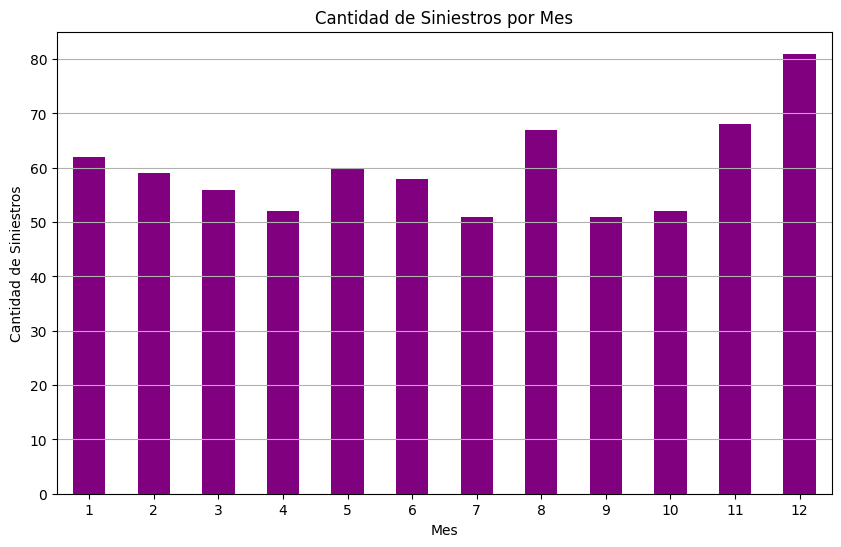

In [66]:
plt.figure(figsize=(10, 6))
combinado.groupby('MM')['ID'].count().plot(kind='bar', color='purple')
plt.title('Cantidad de Siniestros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


El DataFrame proporciona datos sobre la cantidad de víctimas de siniestros viales en diferentes meses (representados por números del 1 al 12):

1. Distribución de víctimas por mes:
   - El DataFrame muestra el número de víctimas de siniestros viales para cada mes del año, desde enero (mes 1) hasta diciembre (mes 12).

2. Variación en el número de víctimas:
   - Hay variaciones en el número de víctimas de un mes a otro a lo largo del año. Por ejemplo, el mes 12 (diciembre) tiene el mayor número de víctimas con 81, mientras que el mes 8 (agosto) tiene 67 víctimas. El mes 7 (julio) tiene el menor número de víctimas con 51.

3. Estacionalidad:
   - Estos datos sugieren que podría haber una estacionalidad en los siniestros viales, con un aumento en el número de víctimas en los meses finales del año (noviembre y diciembre). Esto podría estar relacionado con factores como las condiciones climáticas, festividades o mayor actividad de tráfico en las vacaciones de fin de año.

4. Análisis de tendencias:
   - Para un análisis más detallado, se podrían utilizar técnicas de análisis de tendencias para identificar patrones estacionales y tendencias a lo largo del año. Esto podría ser útil para implementar medidas de seguridad vial específicas en momentos en que se observa un aumento en el número de víctimas.

5. Factores externos:
   - Es importante considerar factores externos que podrían influir en la cantidad de víctimas, como la aplicación de medidas de seguridad, el estado de las carreteras, la educación vial y el cumplimiento de las normas de tráfico.

6. Políticas de prevención:
   - Estos datos pueden ser útiles para evaluar la efectividad de las políticas de prevención de siniestros viales y para ajustar estrategias en función de las tendencias observadas en diferentes meses.


Gráfico de Barras por Comuna

In [97]:
victimas_por_comuna = combinado.groupby('COMUNA')['VICTIMA'].count().reset_index()

In [98]:
victimas_por_comuna

,COMUNA,VICTIMA
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


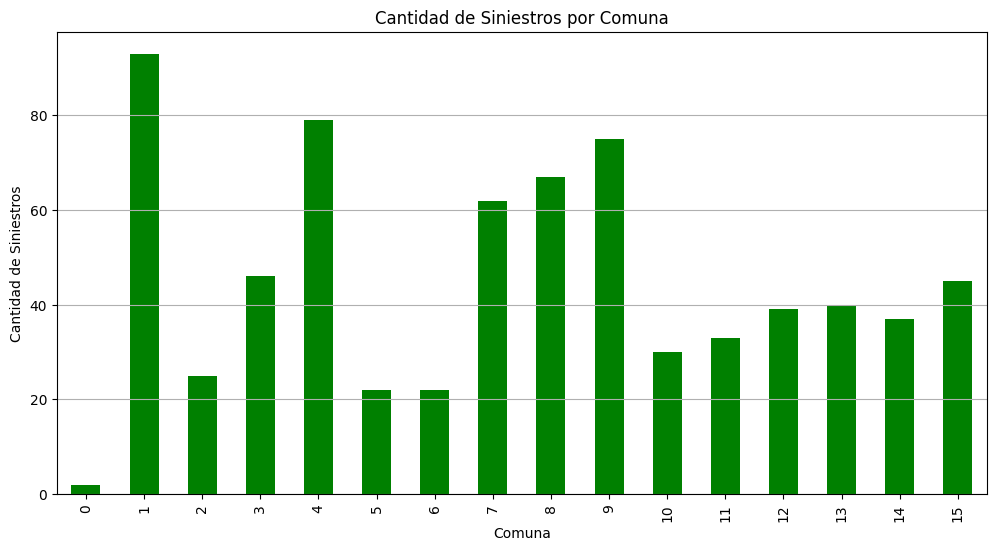

In [67]:
plt.figure(figsize=(12, 6))
combinado['COMUNA'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Cantidad de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.grid(axis='y')
plt.show()


El DataFrame proporciona datos sobre el número de víctimas de siniestros viales en diferentes comunas:

1. Distribución de víctimas por comuna:
   - El DataFrame muestra el número de víctimas de siniestros viales para cada comuna, identificada por un número que va del 0 al 15.

2. Variación en el número de víctimas por comuna:
   - Existe variación en el número de víctimas de siniestros viales en diferentes comunas.
   - La comuna 1 tiene el mayor número de víctimas con 93, mientras que la comuna 0 tiene la menor cantidad de víctimas con 2.

3. Diferencias en la seguridad vial:
   - Estas diferencias en el número de víctimas podrían estar relacionadas con factores como la densidad de tráfico, la infraestructura vial, el cumplimiento de las normas de tráfico y la implementación de medidas de seguridad vial.

4. Políticas de seguridad vial:
   - Estos datos pueden ser útiles para evaluar la efectividad de las políticas de seguridad vial en diferentes comunas y para identificar aquellas que podrían requerir medidas de prevención adicionales.

5. Análisis geoespacial:
   - Para un análisis más profundo, se podrían utilizar técnicas de análisis geoespacial para mapear la ubicación de los siniestros viales y las áreas con un mayor número de víctimas.

6. Factores locales:
   - Es importante considerar factores locales específicos que podrían contribuir a las diferencias en la seguridad vial en cada comuna, como la presencia de cruces peligrosos, la calidad de la señalización y la educación vial local.
